## Loading datasets in Python

The aim of this notebook is to illustrate how to load in python datasets that can be useful for working on your project. The main library that we will use to manipulate our files is xarray. [Here](https://docs.xarray.dev/en/stable/) you can find a lot of information on this great python package! 

Let's start by saying that xarray is designed to deal with netCDF files, which is a very common data format to store geophysical datasets together with geographycal information (e.g., a longitude/latitude grid) and metadata. netCDF files are suitable for both satellite observations and model simulations (and more!).

The datasets that we will use in this projects are not directly stored as netCDF files, and thet's why we want to provide you with some additional instruments to deal with these datasets.

## ARCO-ERA5

ERA5 is the fifth generation of the European Centre for Medium-Range Weather Forecasts ([ECMWF](https://www.ecmwf.int)) Atmospheric Reanalysis, providing hourly estimates of a large number of atmospheric, land, and oceanic climate variables. This data spans from 1940 to the present, covering the Earth on a 30 km grid and resolving the atmosphere using 137 levels from the surface up to a height of 80 km.

A reanalysis is the "most complete picture currently possible of past weather and climate." Reanalyses are created from the assimilation of a wide range of data sources via numerical weather prediction (NWP) models. Meteorologically valuable variables for land and atmosphere were ingested and converted from GRIB data to Zarr (with no other modifications) to surface a cloud-optimized version of ERA5. In addition, an open-sourced code base is provided to show the provenance of the data as well as demonstrate common research workflows. This dataset includes both raw (GRIB) and cloud-optimized (Zarr) files.

Use cases. ERA5 data can be used in many different applications, including:

- Training ML models that predict the impact of weather on different phenomena
- Training and evaluating ML models that forecast the weather
- Computing climatologies, the average weather for a region over a given period of time
- Visualizing and studying historical weather events

Thanks to the open data policy of the Copernicus Climate Change and Atmosphere Monitoring Services and ECMWF, this dataset is available free as part of the Google Cloud Public Dataset Program. Please see below for license information.

**Here, we will use ERA5 data as a source of information for sea ice concentration.** Obviously, we could use satellite observations directly for our purposes. Nonetheless, the ERA5 reanalysis is convenient in this context because it comes as a cloud dataset, meaning that we do not need to download all the data on our machine to use it. Furthermore, reanalysis fields are conveniently continuous in time and space and provided on an approachable grid. This is not always the case for satellite observations. For our purposes, the ERA5 sea ice concentration is a good proxy for satellite observations because these are assimilated in the reanalysis itself.

Note that there are many more variables that can be accessed through the simple steps outlined below.


In [23]:
# import python packages

import xarray as xr
import numpy as np

In [20]:
# open era5 reanalysis stored as cloud optimized format
era5_reanalysis = xr.open_zarr(
    "gs://gcp-public-data-arco-era5/co/single-level-reanalysis.zarr",
    chunks={'time': 48}, 
    consolidated=True,
)

# this lets you visualize the dataset
era5_reanalysis

<xarray.Dataset> Size: 31TB
Dimensions:              (time: 374016, values: 542080)
Coordinates:
    depthBelowLandLayer  float64 8B ...
    entireAtmosphere     float64 8B ...
    latitude             (values) float64 4MB dask.array<chunksize=(542080,), meta=np.ndarray>
    longitude            (values) float64 4MB dask.array<chunksize=(542080,), meta=np.ndarray>
    number               int64 8B ...
    step                 timedelta64[ns] 8B ...
    surface              float64 8B ...
  * time                 (time) datetime64[ns] 3MB 1979-01-01 ... 2021-08-31T...
    valid_time           (time) datetime64[ns] 3MB dask.array<chunksize=(48,), meta=np.ndarray>
Dimensions without coordinates: values
Data variables: (12/38)
    cape                 (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    d2m                  (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    hcc                  (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    istl1                (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    istl2                (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    istl3                (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    ...                   ...
    tsn                  (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    u10                  (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    u100                 (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    v10                  (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    v100                 (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
    z                    (time, values) float32 811GB dask.array<chunksize=(48, 542080), meta=np.ndarray>
Attributes:
    Conventions:               CF-1.7
    GRIB_centre:               ecmf
    GRIB_centreDescription:    European Centre for Medium-Range Weather Forec...
    GRIB_edition:              1
    GRIB_subCentre:            0
    history:                   2022-09-23T18:56 GRIB to CDM+CF via cfgrib-0.9...
    institution:               European Centre for Medium-Range Weather Forec...
    pangeo-forge:inputs_hash:  5f4378143e9f42402424280b63472752da3aa79179b53b...
    pangeo-forge:recipe_hash:  0c3415923e347ce9dac9dc5c6d209525f4d45d799bd25b...
    pangeo-forge:version:      0.9.1

**This is it!** With a simple command we have access to 38(!) ERA5 variables from 1979 to 2021 with a 1h time resolution. Obviously the data is still on the cloud and not on your computer, but we can explore the metadata and select what we want in the next steps. Note that the data provided above is on a reduce gaussian grid.

Very conveniently, ERA5 is also provided interpolated on a regular 0.25x0.25 longitude/latitude grid

In [10]:
ar_full_37_1h = xr.open_zarr(
    'gs://gcp-public-data-arco-era5/ar/full_37-1h-0p25deg-chunk-1.zarr-v3',
    chunks=None,
    storage_options=dict(token='anon'),
)

ar_full_37_1h

<xarray.Dataset> Size: 3PB
Dimensions:                                                          (
                                                                      time: 1089864,
                                                                      latitude: 721,
                                                                      longitude: 1440,
                                                                      level: 37)
Coordinates:
  * latitude                                                         (latitude) float32 3kB ...
  * level                                                            (level) int64 296B ...
  * longitude                                                        (longitude) float32 6kB ...
  * time                                                             (time) datetime64[ns] 9MB ...
Data variables: (12/273)
    100m_u_component_of_wind                                         (time, latitude, longitude) float32 5TB ...
    100m_v_component_of_wind                                         (time, latitude, longitude) float32 5TB ...
    10m_u_component_of_neutral_wind                                  (time, latitude, longitude) float32 5TB ...
    10m_u_component_of_wind                                          (time, latitude, longitude) float32 5TB ...
    10m_v_component_of_neutral_wind                                  (time, latitude, longitude) float32 5TB ...
    10m_v_component_of_wind                                          (time, latitude, longitude) float32 5TB ...
    ...                                                               ...
    wave_spectral_directional_width_for_swell                        (time, latitude, longitude) float32 5TB ...
    wave_spectral_directional_width_for_wind_waves                   (time, latitude, longitude) float32 5TB ...
    wave_spectral_kurtosis                                           (time, latitude, longitude) float32 5TB ...
    wave_spectral_peakedness                                         (time, latitude, longitude) float32 5TB ...
    wave_spectral_skewness                                           (time, latitude, longitude) float32 5TB ...
    zero_degree_level                                                (time, latitude, longitude) float32 5TB ...

### Exploring the sea ice concentration in ERA5

In [12]:
sea_ice_cover = ar_full_37_1h['sea_ice_cover']
sea_ice_cover

<xarray.DataArray 'sea_ice_cover' (time: 1089864, latitude: 721, longitude: 1440)> Size: 5TB
[1131540399360 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 9MB 1900-01-01 ... 2024-04-30T23:00:00
Attributes:
    long_name:      Sea ice area fraction
    short_name:     siconc
    standard_name:  sea_ice_area_fraction
    units:          (0 - 1)

In [13]:
# Extract the sea ice concentration for a random date.
sea_ice_cover = sea_ice_cover.sel(time="2020-01-01")

# At this point, we move the data from the cloud to our computer
sea_ice_cover.load()

<xarray.DataArray 'sea_ice_cover' (time: 24, latitude: 721, longitude: 1440)> Size: 100MB
array([[[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        [ 1.,  1.,  1., ...,  1.,  1.,  1.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * time       (time) datetime64[ns] 192B 2020-01-01 ... 2020-01-01T23:00:00
Attributes:
    long_name:      Sea ice area fraction
    short_name:     siconc
    standard_name:  sea_ice_area_fraction
    units:          (0 - 1)

As you can see, we have 24 time snapshots for the day we selected. **Let's now plot the daily mean!** 

As you can see, using this dataset is super easy!

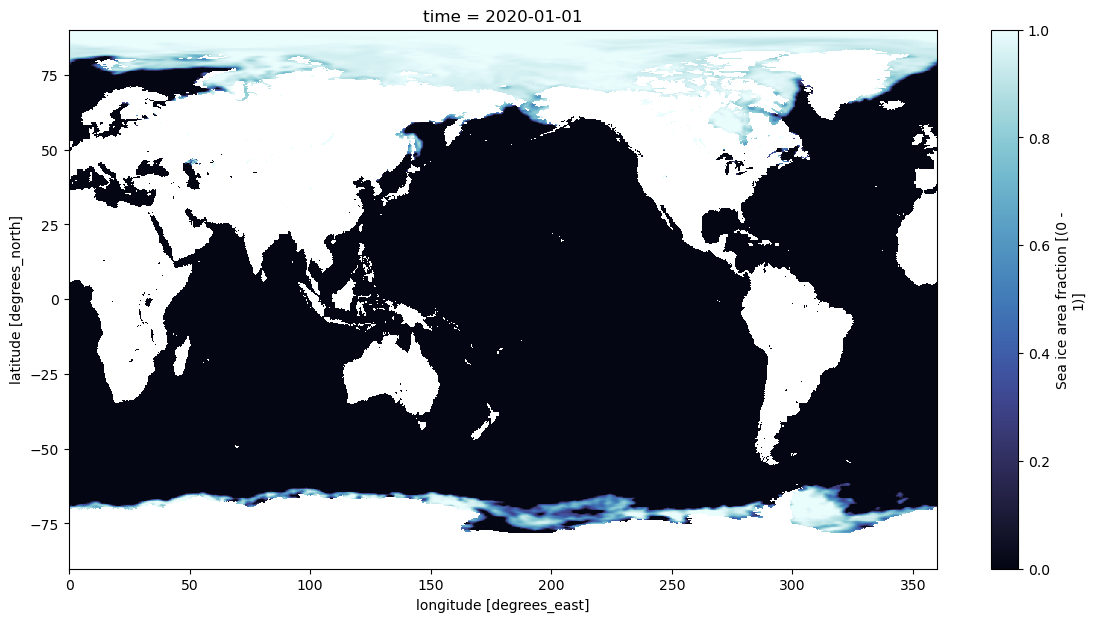

In [17]:
import cmocean

sea_ice_cover.resample(time='1D').mean(dim='time').plot(x='longitude', y='latitude', cmap=cmocean.cm.ice, size=7, aspect=2, add_colorbar=True, robust=True)

### FYI: Same result as above, but using the original ERA5 data on a reduced Gaussian grid that we loaded at the beginning

In this case, we need to perform the interpolation to the regular grid ourselves.

In [25]:
import scipy.spatial

def mirror_point_at_360(ds):
  extra_point = (
      ds.where(ds.longitude == 0, drop=True)
      .assign_coords(longitude=lambda x: x.longitude + 360)
  )
  return xr.concat([ds, extra_point], dim='values')

def build_triangulation(x, y):
  grid = np.stack([x, y], axis=1)
  return scipy.spatial.Delaunay(grid)

def interpolate(data, tri, mesh):
  indices = tri.find_simplex(mesh)
  ndim = tri.transform.shape[-1]
  T_inv = tri.transform[indices, :ndim, :]
  r = tri.transform[indices, ndim, :]
  c = np.einsum('...ij,...j', T_inv, mesh - r)
  c = np.concatenate([c, 1 - c.sum(axis=-1, keepdims=True)], axis=-1)
  result = np.einsum('...i,...i', data[:, tri.simplices[indices]], c)
  return np.where(indices == -1, np.nan, result)

# Extract the sea ice concentration for a random date.
sea_ice_cover_rgr = era5_reanalysis['siconc'].sel(time="2020-01-01").resample(time='1D').mean(dim='time')

# At this point, we move the data from the cloud to our computer
sea_ice_cover_rgr.load()

longitude = np.linspace(0, 360, num=360*4+1) 
latitude = np.linspace(-90, 90, num=180*4+1)
mesh = np.stack(np.meshgrid(longitude, latitude, indexing='ij'), axis=-1)
tri = build_triangulation(sea_ice_cover_rgr.longitude, sea_ice_cover_rgr.latitude)
sea_ice_cover_mesh = interpolate(sea_ice_cover_rgr.values, tri, mesh)
sea_ice_cover_interp = xr.DataArray(sea_ice_cover_mesh, coords=[('time', sea_ice_cover_rgr.time.data), ('longitude', longitude), ('latitude', latitude)])

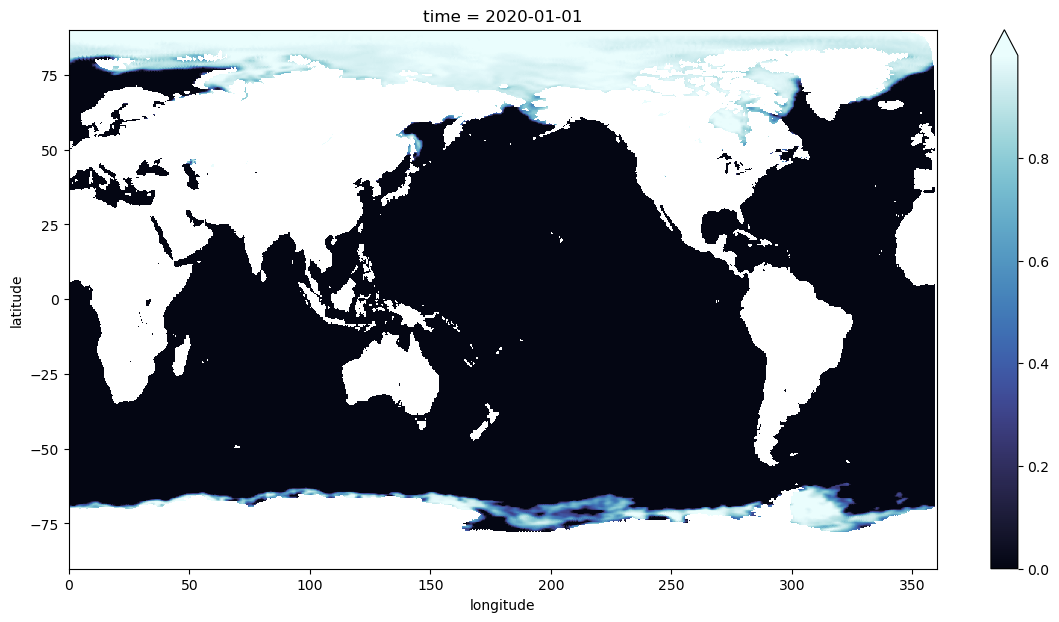

In [26]:
sea_ice_cover_interp.plot(x='longitude', y='latitude', cmap=cmocean.cm.ice, size=7, aspect=2, add_colorbar=True, robust=True)